In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import os

def average_data(L, T, dt, p, d, shot, time_slice):
    # Ensure the save directory exists, create it if it doesn't
    save_dir = '/Users/uditvarma/Documents/s3_data/mean_qnv'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    S_list = []
    for sss in range(1, shot+1):
        tag = f"/Users/uditvarma/Documents/s3_data/data_qnv/L{L},T{T},dt{dt:.1f},p{p},dir{d},s{sss}_qnv.npy"
        if os.path.isfile(tag):
            S = np.load(tag)
            S_list.append(S)
    
    S_list = np.array(S_list)
    S_mean = []
    S_var = []
    
    for i in range(time_slice):
        S_mean.append(np.mean(S_list[:, i]))
        S_var.append(np.var(S_list[:, i]))
    
    # Save the resulting arrays to the designated folder
    np.save(os.path.join(save_dir, f"Emean_L{L},T{T},dt{dt},p{p}_qnv.npy"), S_mean)
    np.save(os.path.join(save_dir, f"Evar_L{L},T{T},dt{dt},p{p}_qnv.npy"), S_var)

In [37]:
for L in [5, 6]:
    for T in [60.0]:
        for p in [0.3]:
            for d in ["Z2"]:
                for dt in[1.0]:
                    average_data(L,T,dt,p,d,50,60)

With broadcasting to debug the

In [5]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L6,T60.0,dt1.0,p0.3_hc.npy")

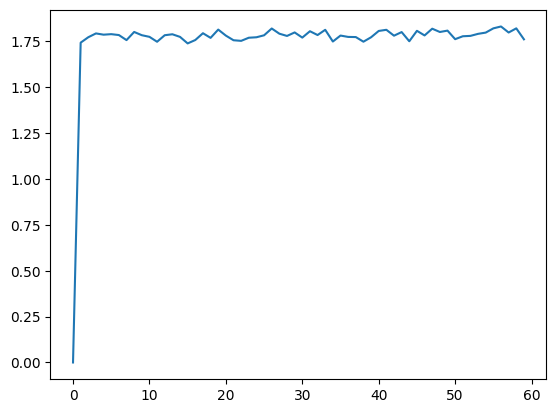

In [6]:
plt.plot(data)

optimized code with s3.jl time-evolution

In [9]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hc_p/Emean_L6,T60.0,dt1.0,p0.3_hc.npy")

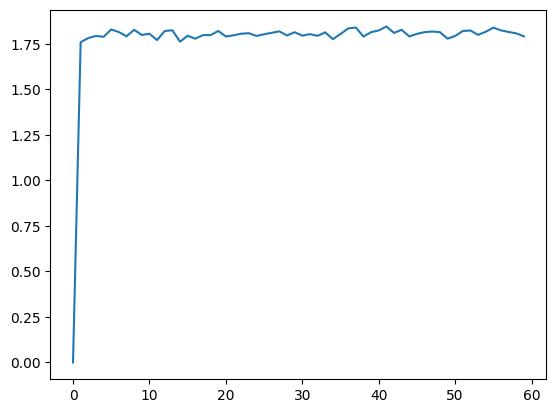

In [10]:
plt.plot(data)

In [11]:
## New code trial

In [30]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L6,T60.0,dt1.0,p0.3_hc.npy")

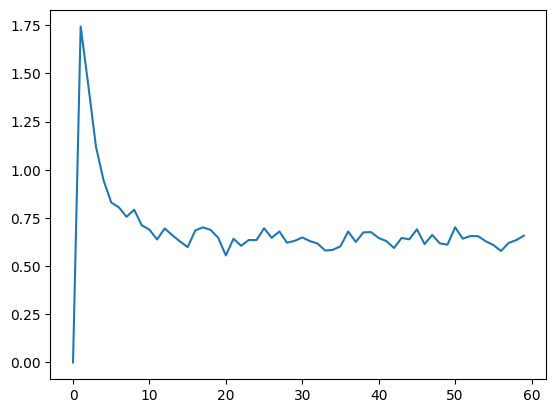

In [31]:
plt.plot(data)

In [34]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_qnv/Emean_L6,T60.0,dt1.0,p0.3_qnv.npy")

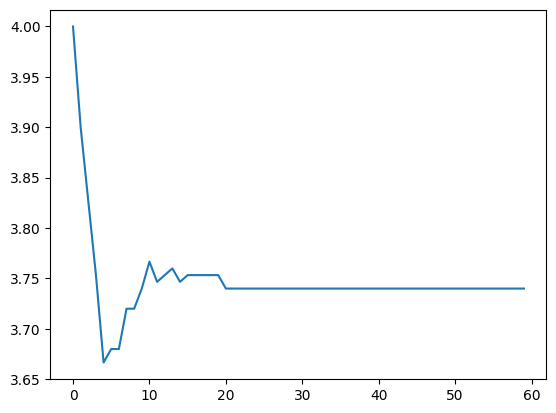

In [35]:
plt.plot(data)

In [38]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_qnv/Emean_L6,T60.0,dt1.0,p0.3_qnv.npy")

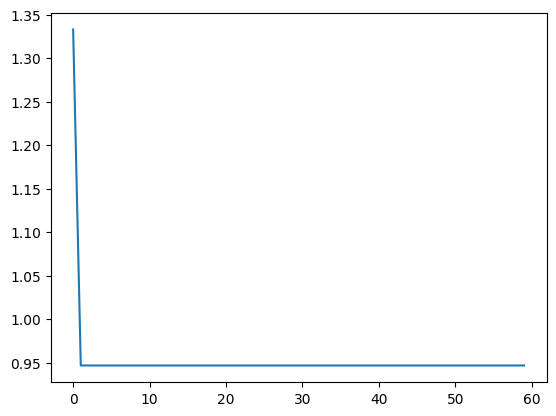

In [39]:
plt.plot(data)